In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
from IPython.display import display, Image
import ipywidgets as widgets
from shutil import move
from PIL import Image as PILImage
from IPython.display import clear_output

In [3]:
path_imagenes = "./drive/MyDrive/MNA/concentrado_imagenes_imo"

In [4]:
folder_path = path_imagenes
original_folder = os.path.join(folder_path)
accepted_folder = os.path.join(folder_path, "aceptadas")
rejected_folder = os.path.join(folder_path, "rechazadas")

In [5]:
os.makedirs(accepted_folder, exist_ok=True)
os.makedirs(rejected_folder, exist_ok=True)

In [6]:
def get_unclassified_images():
    original_images = set(
        im
        for im in os.listdir(original_folder)
        if im.endswith((".jpg", ".jpeg", ".png", ".gif"))
    )
    accepted_images = set(os.listdir(accepted_folder))
    rejected_images = set(os.listdir(rejected_folder))

    unclassified_images = list(original_images - accepted_images - rejected_images)
    print("Sin clasificar: ", len(unclassified_images))
    print("Aceptadas: ", len(accepted_images))
    print("Rechazadas: ", len(rejected_images))

    return unclassified_images

In [7]:
def show_image(image_path):
    img = PILImage.open(image_path)
    # img.tile(image_path)
    img.thumbnail((300, 300))  # Ajusta el tamaño si es necesario
    display(img)

In [8]:
# Función para manejar la acción de aceptar o rechazar
def handle_classification(accepted):
    current_image_path = os.path.join(original_folder, current_image)
    if accepted:
        move(current_image_path, os.path.join(accepted_folder, current_image))
    else:
        move(current_image_path, os.path.join(rejected_folder, current_image))

    clear_output()
    classify_next_image()

In [9]:
# Función para clasificar la siguiente imagen
def classify_next_image():
    global current_image
    unclassified_images = get_unclassified_images()

    if len(unclassified_images) == 0:
        print("No hay más imágenes para clasificar.")
    else:
        current_image = unclassified_images[0]
        image_path = os.path.join(original_folder, current_image)
        show_image(image_path)
        display(buttons)

Sin clasificar:  41296
Aceptadas:  85
Rechazadas:  816


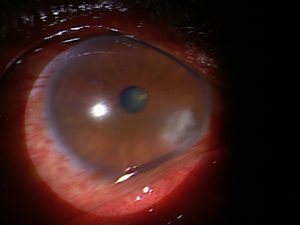

In [10]:
# Crear botones de Aceptar y Rechazar
button_accept = widgets.Button(description="Aceptada")
button_reject = widgets.Button(description="Rechazada")

# Asignar acciones a los botones
button_accept.on_click(lambda x: handle_classification(True))
button_reject.on_click(lambda x: handle_classification(False))

# Contenedor de los botones
buttons = widgets.HBox([button_accept, button_reject])

# Iniciar la clasificación
classify_next_image()